# 🧩 Variable Transformation - Real Estate Analytics Case Study

**Real-World Scenario:** You're a data scientist at **PropertySmart**, a leading real estate platform in the UK. Your team needs to build a machine learning model to predict house prices, but the raw data has distribution issues that could affect model performance. You need to transform variables to improve the data quality before training your predictive models.

**Learning Objective:** Learn how to identify distribution problems and apply appropriate transformations to improve data quality for machine learning models.

## Prerequisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 🔍 STEP 1: Understanding Why Data Distribution Matters in Real Estate

### Q2.1: If you had to guess house prices in London, would you expect all values to be evenly spread or concentrated in a certain range?

**Answer:** Concentrated. Most houses fall within a certain price range, with only a few extremely expensive or unusually cheap properties.

**Real-World Context:**
In the UK property market:
- Most properties are in the £200k-£600k range
- A few luxury properties cost millions
- Some properties in deprived areas might be much cheaper
- This creates a **skewed distribution** that affects our analysis

Let's examine PropertySmart's actual house price data:

In [2]:
# PropertySmart's house price database (sample data)
property_data = {
    'property_id': ['PROP001', 'PROP002', 'PROP003', 'PROP004', 'PROP005', 'PROP006', 'PROP007', 'PROP008', 'PROP009', 'PROP010'],
    'location': ['Manchester', 'London', 'Birmingham', 'London', 'Liverpool', 'London', 'Bristol', 'Manchester', 'London', 'Edinburgh'],
    'price': [185000, 450000, 220000, 850000, 165000, 1200000, 320000, 195000, 2500000, 280000],  # House prices in £
    'square_footage': [950, 1200, 1100, 1800, 850, 2200, 1350, 980, 3500, 1150],  # Size in sq ft
    'bedrooms': [2, 3, 3, 4, 2, 5, 3, 2, 6, 3],
    'age_years': [25, 45, 15, 85, 30, 120, 10, 35, 200, 20],  # Property age
    'monthly_rent_estimate': [1100, 2800, 1400, 4200, 980, 7500, 1900, 1200, 15000, 1650]  # Estimated rental income
}

df = pd.DataFrame(property_data)
print("PropertySmart House Price Database:")
print(df)

PropertySmart House Price Database:
  property_id    location    price  square_footage  bedrooms  age_years  \
0     PROP001  Manchester   185000             950         2         25   
1     PROP002      London   450000            1200         3         45   
2     PROP003  Birmingham   220000            1100         3         15   
3     PROP004      London   850000            1800         4         85   
4     PROP005   Liverpool   165000             850         2         30   
5     PROP006      London  1200000            2200         5        120   
6     PROP007     Bristol   320000            1350         3         10   
7     PROP008  Manchester   195000             980         2         35   
8     PROP009      London  2500000            3500         6        200   
9     PROP010   Edinburgh   280000            1150         3         20   

   monthly_rent_estimate  
0                   1100  
1                   2800  
2                   1400  
3                   4200  
4  

### Q2.2: What would happen if you plotted this house price data on a histogram?

**Answer:** It would show a right-skewed distribution – most values are on the left (lower prices), with a long tail to the right (expensive properties).

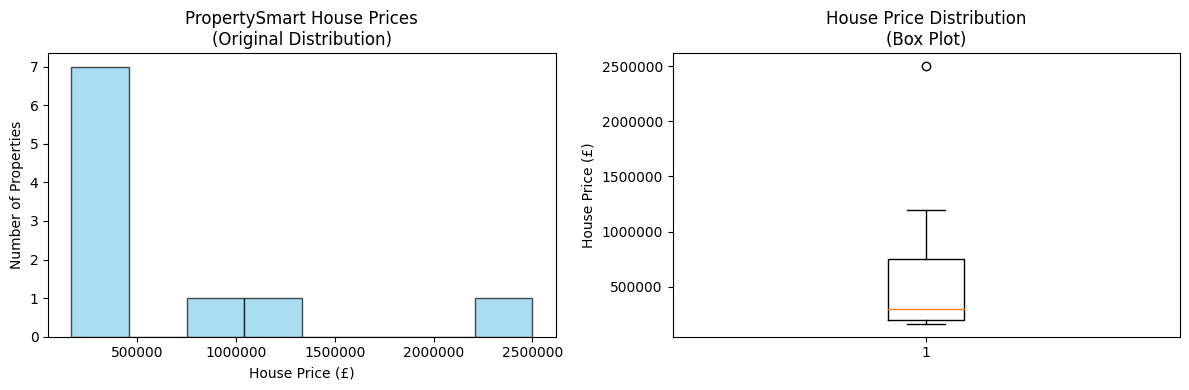

House Price Statistics:
Mean: £636,500
Median: £300,000
Standard Deviation: £737,289
Minimum: £165,000
Maximum: £2,500,000


In [3]:
# Visualise the original price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('PropertySmart House Prices\n(Original Distribution)')
plt.xlabel('House Price (£)')
plt.ylabel('Number of Properties')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('House Price Distribution\n(Box Plot)')
plt.ylabel('House Price (£)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# Calculate basic statistics
print(f"House Price Statistics:")
print(f"Mean: £{df['price'].mean():,.0f}")
print(f"Median: £{df['price'].median():,.0f}")
print(f"Standard Deviation: £{df['price'].std():,.0f}")
print(f"Minimum: £{df['price'].min():,.0f}")
print(f"Maximum: £{df['price'].max():,.0f}")

**Interpretation:**
A right-skewed (positively skewed) distribution has:
- **Many small values** (most houses are modestly priced)
- **Few large values** (luxury properties are rare)
- **Mean > Median** (the average is pulled up by expensive properties)

This pattern is common for:
- House prices and property values
- Personal incomes and salaries
- Company revenues and sales figures
- Website traffic and social media engagement



### Q2.3: What does skewed data mean for machine learning models?

**Answer:** Many models assume the data is roughly normally distributed. Skewed data can reduce model accuracy and make feature relationships harder to learn.

**Business Impact for PropertySmart:**


### Impact of Skewed Data on ML Models

#### 1. Linear Regression
- Assumes linear relationships  
- Skewed data can violate **homoscedasticity** (equal variance)  
- Predictions may be biased towards extreme values  

#### 2. Distance-based Models (KNN, K-means)
- Sensitive to scale differences  
- Expensive properties dominate distance calculations  
- Similar modest properties might be considered *different*  

#### 3. Neural Networks
- Can struggle with extreme value ranges  
- May take longer to converge  
- Could produce unstable predictions  

---

#### Real Estate Business Consequences
❌ Inaccurate price predictions  
❌ Poor property recommendations  
❌ Biased market analysis  
❌ Failed investment strategies  


## 🔍 STEP 2: Measuring Skewness in Property Data

### Q2.4: How can we measure how skewed our house price data is?

**Answer:** Use `df['price'].skew()` to get a numerical measure of skewness.


In [5]:
# Calculate skewness for numerical variables
numerical_columns = ['price', 'square_footage', 'age_years', 'monthly_rent_estimate']

print("PropertySmart Data Skewness Analysis:")
print("=" * 50)

for col in numerical_columns:
    skewness = df[col].skew()
    print(f"{col}:")
    print(f"  Skewness: {skewness:.3f}")
    
    # Interpret the skewness
    if abs(skewness) < 0.5:
        interpretation = "Approximately symmetric ✅"
    elif abs(skewness) < 1.0:
        interpretation = "Moderately skewed ⚠️"
    else:
        interpretation = "Highly skewed ❌"
    
    if skewness > 0:
        direction = "Right-skewed (positive)"
    elif skewness < 0:
        direction = "Left-skewed (negative)"
    else:
        direction = "Symmetric"
    
    print(f"  Direction: {direction}")
    print(f"  Severity: {interpretation}")
    print()

PropertySmart Data Skewness Analysis:
price:
  Skewness: 2.156
  Direction: Right-skewed (positive)
  Severity: Highly skewed ❌

square_footage:
  Skewness: 1.930
  Direction: Right-skewed (positive)
  Severity: Highly skewed ❌

age_years:
  Skewness: 1.731
  Direction: Right-skewed (positive)
  Severity: Highly skewed ❌

monthly_rent_estimate:
  Skewness: 2.209
  Direction: Right-skewed (positive)
  Severity: Highly skewed ❌



### Transformation Strategy Based on Skewness

#### 📊 For POSITIVE SKEW (right tail):
- **Mild skew (0.5–1.0):** Square root transformation  
- **Moderate skew (1.0–2.0):** Log transformation  
- **Severe skew (>2.0):** Box-Cox transformation  

#### 📊 For NEGATIVE SKEW (left tail):
- **Power transformations:** Squaring, cubing  
- **Reflection then log transformation**  

#### 📊 For SCALE ISSUES (symmetric but different ranges):
- **Standardisation (Z-score)**  
- **Min-Max normalisation**  


In [22]:
# Analyse our specific data
print(f"\n🏠 PropertySmart Recommendations:")
for col in numerical_columns:
    skewness = df[col].skew()
    if skewness > 2.0:
        recommendation = "Box-Cox transformation"
    elif skewness > 1.0:
        recommendation = "Log transformation"
    elif skewness > 0.5:
        recommendation = "Square root transformation"
    elif skewness < -0.5:
        recommendation = "Power transformation"
    else:
        recommendation = "Standardisation only"
    
    print(f"   {col}: {recommendation}")


🏠 PropertySmart Recommendations:
   price: Box-Cox transformation
   square_footage: Log transformation
   age_years: Log transformation
   monthly_rent_estimate: Box-Cox transformation


---

## 🔍 STEP 3: Applying Common Transformations to Property Data

### 🔸 1. Log Transformation

### Q2.6: What does the log transformation do to our house price data?

**Answer:** It compresses large values (expensive properties) and stretches small values (modest properties), making the distribution more symmetric.


In [24]:
print("📈 LOG TRANSFORMATION FOR HOUSE PRICES")
print("=" * 50)

# Apply log transformation (add 1 to handle any zero values safely)
df['log_price'] = np.log(df['price'])

print("Before and After Comparison:")
print(f"Original price range: £{df['price'].min():,} to £{df['price'].max():,}")
print(f"Log price range: {df['log_price'].min():.2f} to {df['log_price'].max():.2f}")

print(f"\nSkewness Comparison:")
print(f"Original price skewness: {df['price'].skew():.3f}")
print(f"Log price skewness: {df['log_price'].skew():.3f}")

📈 LOG TRANSFORMATION FOR HOUSE PRICES
Before and After Comparison:
Original price range: £165,000 to £2,500,000
Log price range: 12.01 to 14.73

Skewness Comparison:
Original price skewness: 2.156
Log price skewness: 0.999


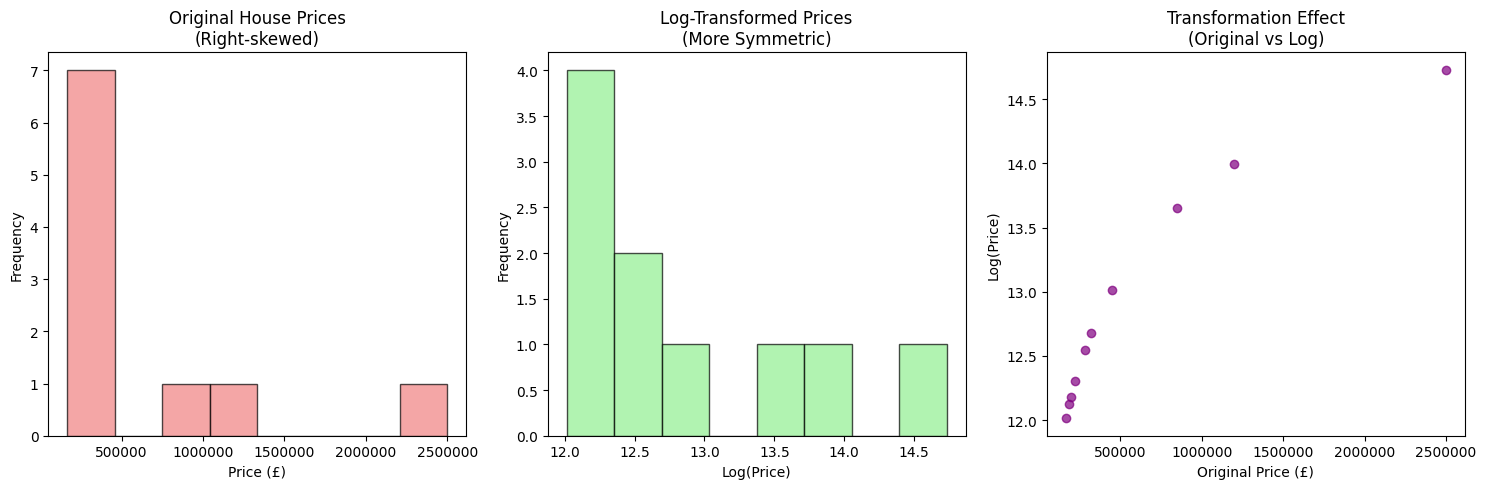


🏠 Business Interpretation:
• Expensive properties (£2.5M) become more comparable to modest ones
• ML models can better learn relationships across all price ranges
• Reduces influence of luxury property outliers


In [25]:
# Visualise the transformation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Original House Prices\n(Right-skewed)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 3, 2)
plt.hist(df['log_price'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Prices\n(More Symmetric)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(df['price'], df['log_price'], alpha=0.7, color='purple')
plt.title('Transformation Effect\n(Original vs Log)')
plt.xlabel('Original Price (£)')
plt.ylabel('Log(Price)')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

print("\n🏠 Business Interpretation:")
print("• Expensive properties (£2.5M) become more comparable to modest ones")
print("• ML models can better learn relationships across all price ranges")
print("• Reduces influence of luxury property outliers")

In [ ]:
print("📈 LOG TRANSFORMATION FOR HOUSE PRICES")
print("=" * 50)

# Apply log transformation (add 1 to handle any zero values safely)
df['log_price'] = np.log(df['price'])

print("Before and After Comparison:")
print(f"Original price range: £{df['price'].min():,} to £{df['price'].max():,}")
print(f"Log price range: {df['log_price'].min():.2f} to {df['log_price'].max():.2f}")

print(f"\nSkewness Comparison:")
print(f"Original price skewness: {df['price'].skew():.3f}")
print(f"Log price skewness: {df['log_price'].skew():.3f}")

# Visualise the transformation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Original House Prices\n(Right-skewed)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 3, 2)
plt.hist(df['log_price'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Prices\n(More Symmetric)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(df['price'], df['log_price'], alpha=0.7, color='purple')
plt.title('Transformation Effect\n(Original vs Log)')
plt.xlabel('Original Price (£)')
plt.ylabel('Log(Price)')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

#### 🏠 Business Interpretation

- Expensive properties (£2.5M) become more comparable to modest ones  
- ML models can better learn relationships across all price ranges  
- Reduces influence of luxury property outliers  

**Important Note for Real Data:**

In [26]:
# Safe log transformation for real-world data
print("⚠️  IMPORTANT: Safe Log Transformation")
print("For data that might contain zeros or negative values:")

# Method 1: Add 1 before log transformation
df['log_price_safe'] = np.log(df['price'] + 1)

# Method 2: Check for zeros/negatives first
def safe_log_transform(series):
    if (series <= 0).any():
        print(f"Warning: Found {(series <= 0).sum()} non-positive values")
        return np.log(series + 1)  # Add 1 to make all values positive
    else:
        return np.log(series)

print("Always check your data before applying log transformation!")

⚠️  IMPORTANT: Safe Log Transformation
For data that might contain zeros or negative values:
Always check your data before applying log transformation!


### 🔸 2. Square Root Transformation

### Q2.7: When might a square root transformation be useful for property data?

**Answer:** When the skew is moderate, not extreme. It's gentler than log transformation and safer for zero values.

In [27]:
print("🔢 SQUARE ROOT TRANSFORMATION")
print("=" * 50)

# Apply square root transformation
df['sqrt_price'] = np.sqrt(df['price'])

print("Square Root Transformation Results:")
print(f"Original price skewness: {df['price'].skew():.3f}")
print(f"Square root price skewness: {df['sqrt_price'].skew():.3f}")



🔢 SQUARE ROOT TRANSFORMATION
Square Root Transformation Results:
Original price skewness: 2.156
Square root price skewness: 1.582


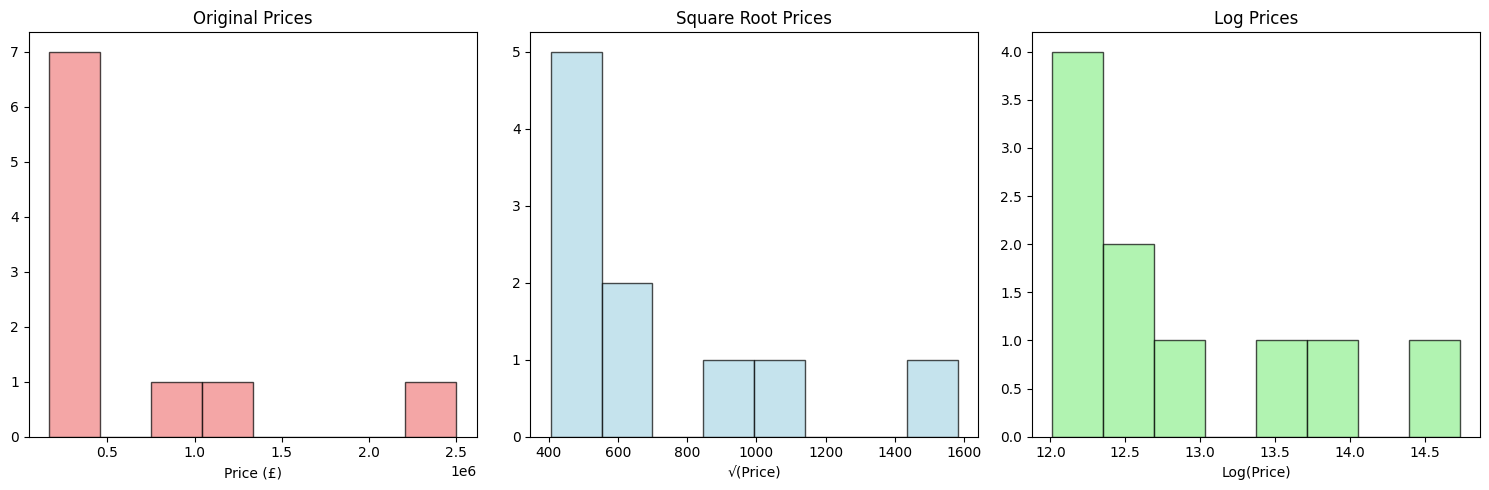


🏠 When to Use Square Root:
✅ Moderate positive skew (0.5 < skewness < 1.5)
✅ Data contains zero values (unlike log)
✅ Want to preserve some of the original scale
✅ Easier to interpret than log transformation


In [28]:
# Compare transformations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Original Prices')
plt.xlabel('Price (£)')

plt.subplot(1, 3, 2)
plt.hist(df['sqrt_price'], bins=8, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Square Root Prices')
plt.xlabel('√(Price)')

plt.subplot(1, 3, 3)
plt.hist(df['log_price'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Log Prices')
plt.xlabel('Log(Price)')

plt.tight_layout()
plt.show()

print("\n🏠 When to Use Square Root:")
print("✅ Moderate positive skew (0.5 < skewness < 1.5)")
print("✅ Data contains zero values (unlike log)")
print("✅ Want to preserve some of the original scale")
print("✅ Easier to interpret than log transformation")

### 🔸 3. Box-Cox Transformation

### Q2.8: What is a Box-Cox transformation and how does it help with property prices?

**Answer:** A statistical technique that automatically finds the best transformation to normalise the data.

In [29]:
print("📦 BOX-COX TRANSFORMATION")
print("=" * 50)

# Apply Box-Cox transformation
# Note: Box-Cox requires strictly positive data
positive_prices = df['price'][df['price'] > 0]
prices_boxcox, fitted_lambda = stats.boxcox(positive_prices)

print(f"Box-Cox Analysis Results:")
print(f"Optimal lambda parameter: {fitted_lambda:.4f}")
print(f"Lambda interpretation:")

if abs(fitted_lambda) < 0.1:
    print("  → Suggests log transformation (λ ≈ 0)")
elif abs(fitted_lambda - 0.5) < 0.1:
    print("  → Suggests square root transformation (λ ≈ 0.5)")
elif abs(fitted_lambda - 1) < 0.1:
    print("  → Suggests no transformation needed (λ ≈ 1)")
else:
    print(f"  → Suggests power transformation: x^{fitted_lambda:.3f}")

# Add Box-Cox transformed prices to dataframe
df_boxcox = df.copy()
df_boxcox['price_boxcox'] = np.nan
df_boxcox.loc[df['price'] > 0, 'price_boxcox'] = prices_boxcox

print(f"\nSkewness Comparison:")
print(f"Original: {df['price'].skew():.3f}")
print(f"Box-Cox: {df_boxcox['price_boxcox'].skew():.3f}")



📦 BOX-COX TRANSFORMATION
Box-Cox Analysis Results:
Optimal lambda parameter: -0.6762
Lambda interpretation:
  → Suggests power transformation: x^-0.676

Skewness Comparison:
Original: 2.156
Box-Cox: 0.349


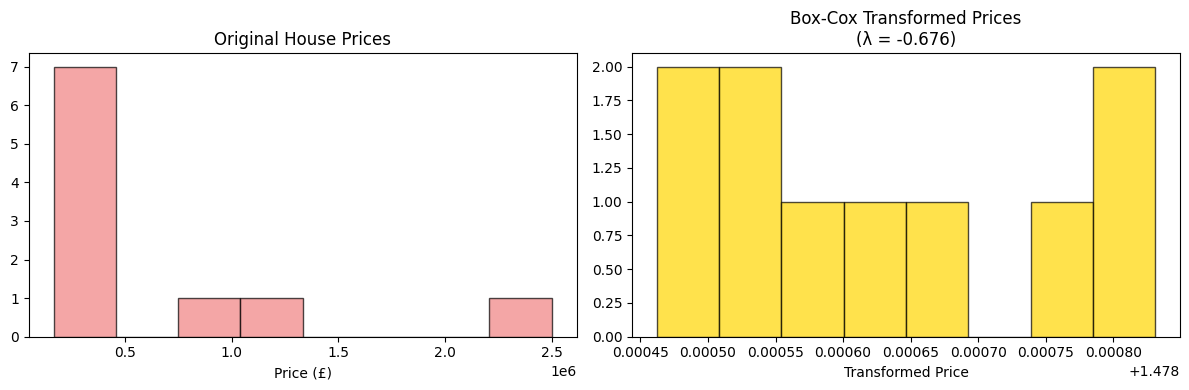


🏠 Box-Cox Advantages:
✅ Automatically finds optimal transformation
✅ Statistically principled approach
✅ Often achieves best normality
❌ Only works with positive data
❌ Results can be hard to interpret


In [30]:
# Visualise Box-Cox transformation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Original House Prices')
plt.xlabel('Price (£)')

plt.subplot(1, 2, 2)
plt.hist(prices_boxcox, bins=8, alpha=0.7, color='gold', edgecolor='black')
plt.title(f'Box-Cox Transformed Prices\n(λ = {fitted_lambda:.3f})')
plt.xlabel('Transformed Price')

plt.tight_layout()
plt.show()

print("\n🏠 Box-Cox Advantages:")
print("✅ Automatically finds optimal transformation")
print("✅ Statistically principled approach")
print("✅ Often achieves best normality")
print("❌ Only works with positive data")
print("❌ Results can be hard to interpret")

### 🔸 4. Standardisation (Z-score)

### Q2.9: What does standardisation do to our property variables?

**Answer:** It rescales values to have a mean of 0 and standard deviation of 1, making different variables comparable.

In [31]:
print("📏 STANDARDISATION (Z-SCORE)")
print("=" * 50)

# Apply standardisation
scaler = StandardScaler()
numerical_cols = ['price', 'square_footage', 'age_years']

# Fit and transform the data
df_scaled = df.copy()
df_scaled[['price_scaled', 'sqft_scaled', 'age_scaled']] = scaler.fit_transform(df[numerical_cols])

print("Before Standardisation:")
for col in numerical_cols:
    print(f"{col}: Mean = {df[col].mean():.1f}, Std = {df[col].std():.1f}")

print("\nAfter Standardisation:")
scaled_cols = ['price_scaled', 'sqft_scaled', 'age_scaled']
for col in scaled_cols:
    print(f"{col}: Mean = {df_scaled[col].mean():.3f}, Std = {df_scaled[col].std():.3f}")



📏 STANDARDISATION (Z-SCORE)
Before Standardisation:
price: Mean = 636500.0, Std = 737288.8
square_footage: Mean = 1508.0, Std = 814.4
age_years: Mean = 58.5, Std = 60.5

After Standardisation:
price_scaled: Mean = 0.000, Std = 1.054
sqft_scaled: Mean = -0.000, Std = 1.054
age_scaled: Mean = 0.000, Std = 1.054


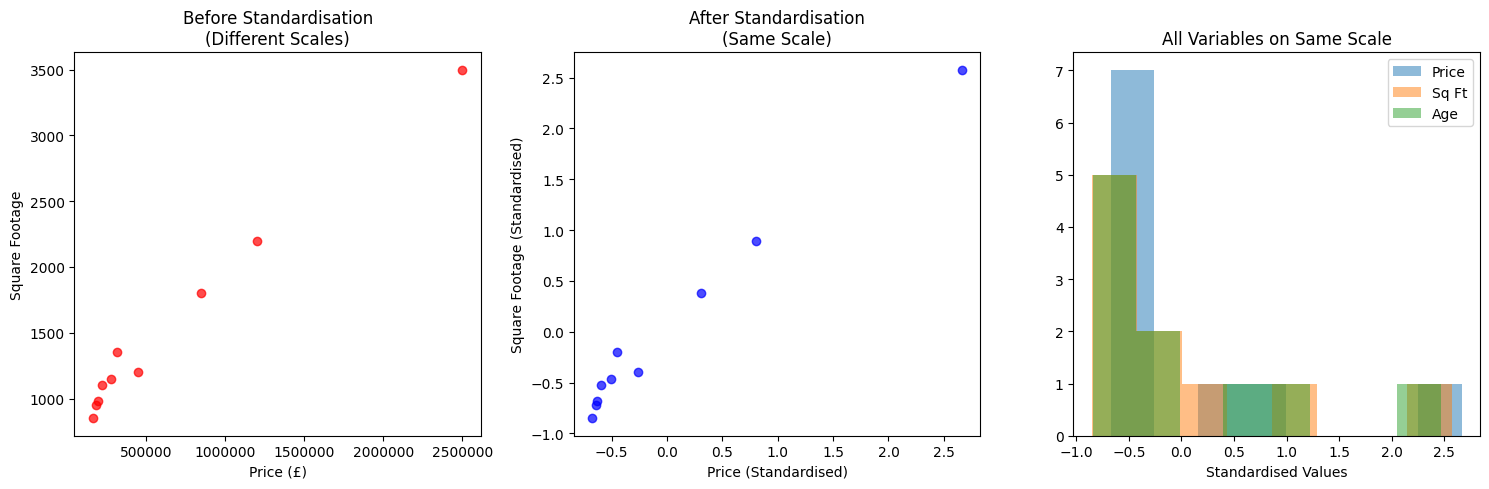


🏠 When to Use Standardisation:
✅ Before using distance-based algorithms (KNN, SVM)
✅ When features have very different scales
✅ For neural networks and gradient descent
❌ Doesn't fix skewness - only changes scale
❌ Makes interpretation harder


In [32]:
# Visualise standardisation effect
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['price'], df['square_footage'], alpha=0.7, color='red')
plt.title('Before Standardisation\n(Different Scales)')
plt.xlabel('Price (£)')
plt.ylabel('Square Footage')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 3, 2)
plt.scatter(df_scaled['price_scaled'], df_scaled['sqft_scaled'], alpha=0.7, color='blue')
plt.title('After Standardisation\n(Same Scale)')
plt.xlabel('Price (Standardised)')
plt.ylabel('Square Footage (Standardised)')

plt.subplot(1, 3, 3)
# Show distributions
plt.hist(df_scaled['price_scaled'], alpha=0.5, label='Price', bins=8)
plt.hist(df_scaled['sqft_scaled'], alpha=0.5, label='Sq Ft', bins=8)
plt.hist(df_scaled['age_scaled'], alpha=0.5, label='Age', bins=8)
plt.title('All Variables on Same Scale')
plt.xlabel('Standardised Values')
plt.legend()

plt.tight_layout()
plt.show()

print("\n🏠 When to Use Standardisation:")
print("✅ Before using distance-based algorithms (KNN, SVM)")
print("✅ When features have very different scales")
print("✅ For neural networks and gradient descent")
print("❌ Doesn't fix skewness - only changes scale")
print("❌ Makes interpretation harder")

### 🔸 5. Min-Max Normalisation

### Q2.10: What does min-max scaling do to our property data?

**Answer:** Rescales data to a fixed range, typically 0 to 1, preserving the relative relationships.

In [33]:
print("🎯 MIN-MAX NORMALISATION")
print("=" * 50)

# Apply Min-Max scaling
min_max_scaler = MinMaxScaler()
df_normalised = df.copy()
df_normalised[['price_norm', 'sqft_norm', 'age_norm']] = min_max_scaler.fit_transform(df[numerical_cols])

print("Min-Max Scaling Results:")
print("Original ranges:")
for col in numerical_cols:
    print(f"  {col}: {df[col].min():.0f} to {df[col].max():.0f}")

print("\nNormalised ranges:")
norm_cols = ['price_norm', 'sqft_norm', 'age_norm']
for col in norm_cols:
    print(f"  {col}: {df_normalised[col].min():.3f} to {df_normalised[col].max():.3f}")



🎯 MIN-MAX NORMALISATION
Min-Max Scaling Results:
Original ranges:
  price: 165000 to 2500000
  square_footage: 850 to 3500
  age_years: 10 to 200

Normalised ranges:
  price_norm: 0.000 to 1.000
  sqft_norm: 0.000 to 1.000
  age_norm: 0.000 to 1.000


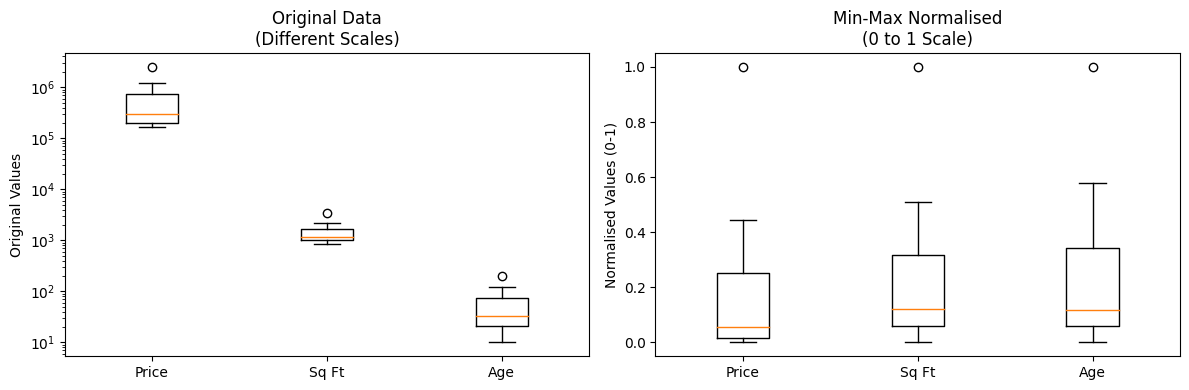


🏠 When to Use Min-Max Normalisation:
✅ Neural networks (bounded inputs)
✅ When you need specific range (0-1)
✅ Preserves original distribution shape
✅ Good for data with known min/max bounds
❌ Sensitive to outliers
❌ May not work well with new data outside original range


In [34]:
# Visualise normalisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot([df['price'], df['square_footage'], df['age_years']], 
            labels=['Price', 'Sq Ft', 'Age'])
plt.title('Original Data\n(Different Scales)')
plt.ylabel('Original Values')
plt.yscale('log')  # Log scale to show all features

plt.subplot(1, 2, 2)
plt.boxplot([df_normalised['price_norm'], df_normalised['sqft_norm'], df_normalised['age_norm']], 
            labels=['Price', 'Sq Ft', 'Age'])
plt.title('Min-Max Normalised\n(0 to 1 Scale)')
plt.ylabel('Normalised Values (0-1)')

plt.tight_layout()
plt.show()

print("\n🏠 When to Use Min-Max Normalisation:")
print("✅ Neural networks (bounded inputs)")
print("✅ When you need specific range (0-1)")
print("✅ Preserves original distribution shape")
print("✅ Good for data with known min/max bounds")
print("❌ Sensitive to outliers")
print("❌ May not work well with new data outside original range")

## 🔍 STEP 4: Visualising the Impact of Transformation

### Q2.11: How can we visually compare distributions before and after transformation?

**Answer:** Using histograms, box plots, and Q-Q plots to assess normality improvement.

📊 COMPREHENSIVE TRANSFORMATION COMPARISON


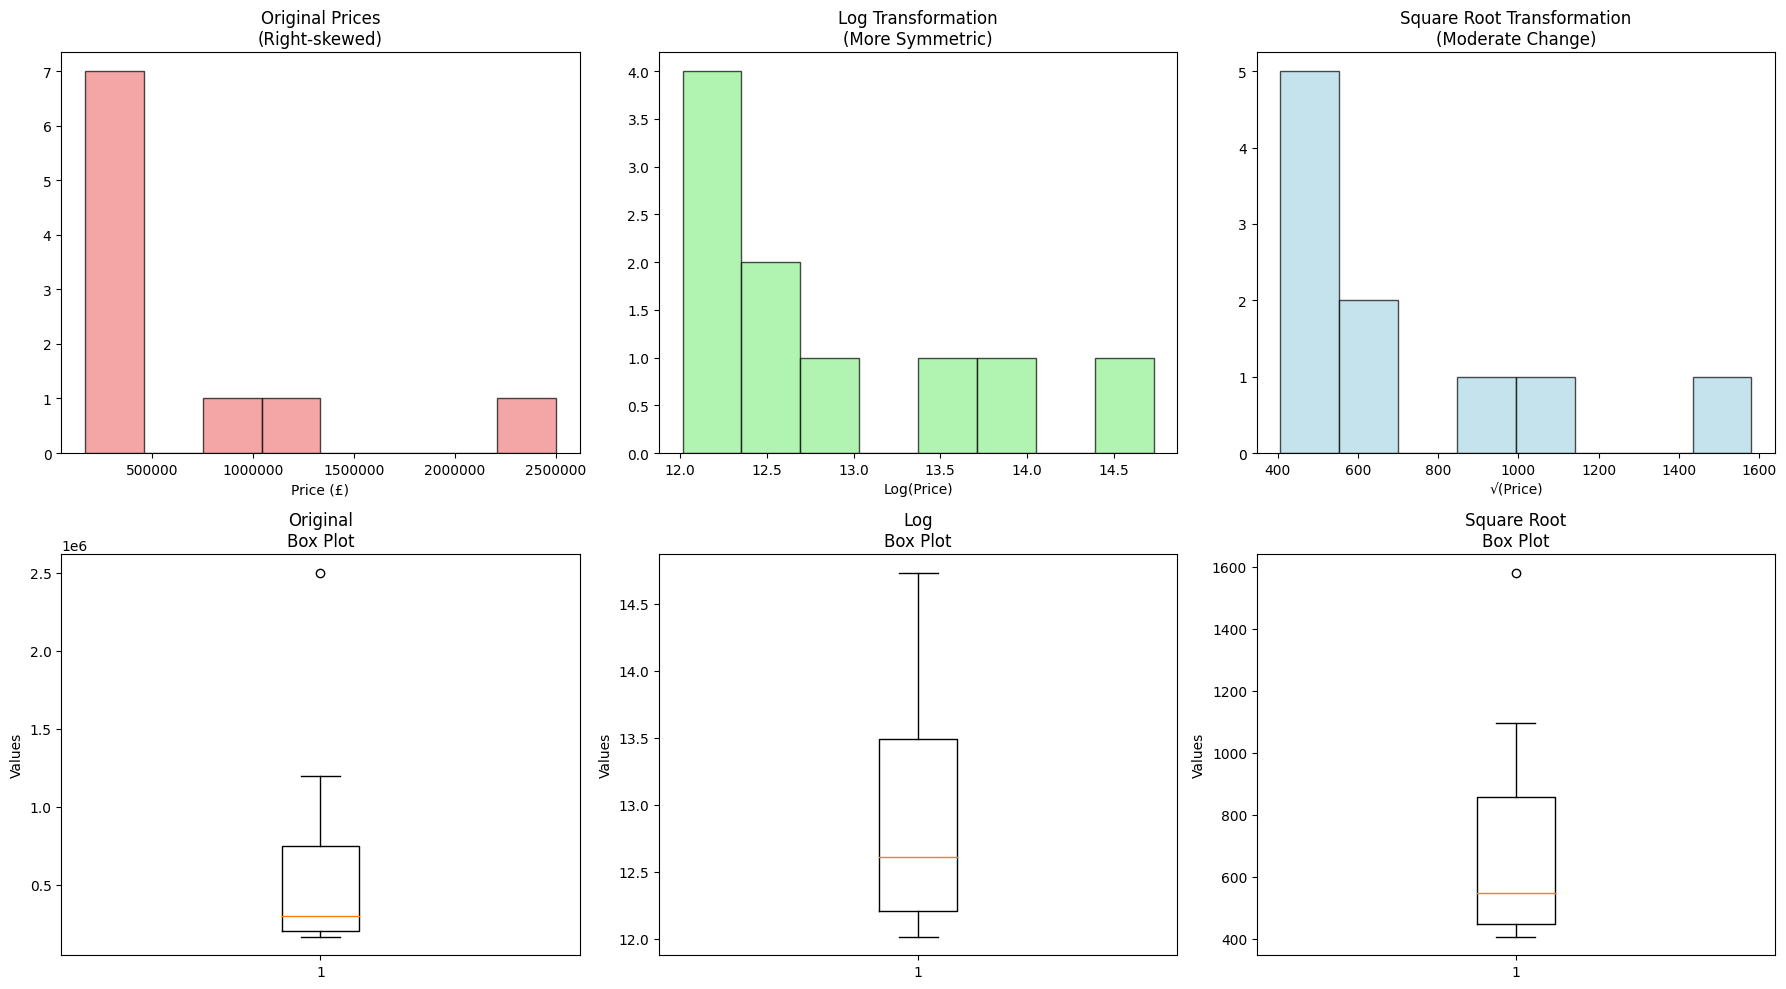


Transformation Effectiveness Summary:
------------------------------------------------------------
Transformation  Skewness   Assessment          
------------------------------------------------------------
Original        2.156      Poor ❌              
Log             0.999      Good ✅              
Square Root     1.582      Poor ❌              
Standardised    2.156      Poor ❌              
Min-Max         2.156      Poor ❌              


In [13]:
print("📊 COMPREHENSIVE TRANSFORMATION COMPARISON")
print("=" * 60)

# Create comprehensive comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Original distribution
axes[0, 0].hist(df['price'], bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Original Prices\n(Right-skewed)')
axes[0, 0].set_xlabel('Price (£)')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Log transformation
axes[0, 1].hist(df['log_price'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Log Transformation\n(More Symmetric)')
axes[0, 1].set_xlabel('Log(Price)')

# Square root transformation
axes[0, 2].hist(df['sqrt_price'], bins=8, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 2].set_title('Square Root Transformation\n(Moderate Change)')
axes[0, 2].set_xlabel('√(Price)')

# Box plots for comparison
box_data = [df['price'], df['log_price'], df['sqrt_price']]
box_labels = ['Original', 'Log', 'Square Root']

for i, (data, label) in enumerate(zip(box_data, box_labels)):
    axes[1, i].boxplot(data)
    axes[1, i].set_title(f'{label}\nBox Plot')
    axes[1, i].set_ylabel('Values')

plt.tight_layout()
plt.show()

# Statistical comparison
transformations = {
    'Original': df['price'],
    'Log': df['log_price'],
    'Square Root': df['sqrt_price'],
    'Standardised': df_scaled['price_scaled'],
    'Min-Max': df_normalised['price_norm']
}

print("\nTransformation Effectiveness Summary:")
print("-" * 60)
print(f"{'Transformation':<15} {'Skewness':<10} {'Assessment':<20}")
print("-" * 60)

for name, data in transformations.items():
    skewness = data.skew()
    if abs(skewness) < 0.5:
        assessment = "Excellent ✅"
    elif abs(skewness) < 1.0:
        assessment = "Good ✅"
    elif abs(skewness) < 1.5:
        assessment = "Fair ⚠️"
    else:
        assessment = "Poor ❌"
    
    print(f"{name:<15} {skewness:<10.3f} {assessment:<20}")

Advanced Visualisation - Q-Q Plots:

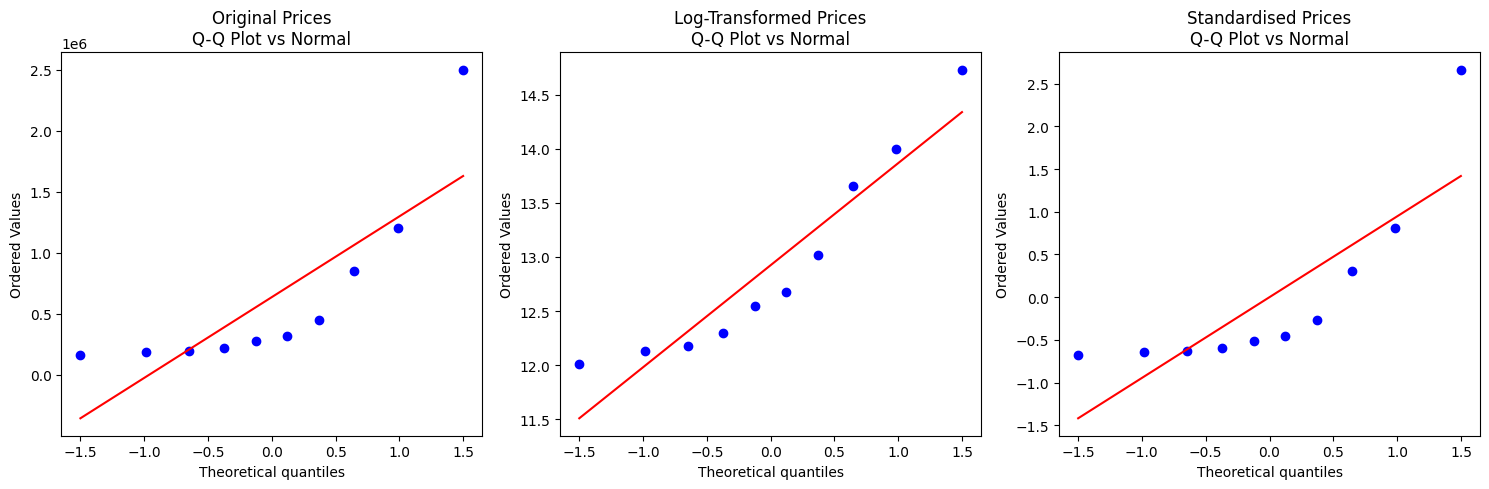

Q-Q Plot Interpretation:
• Points closer to diagonal line = more normal distribution
• Original data shows clear departure from normality
• Transformed data should be closer to the line


In [14]:
# Q-Q plots to check normality
from scipy.stats import probplot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data Q-Q plot
probplot(df['price'], dist="norm", plot=axes[0])
axes[0].set_title('Original Prices\nQ-Q Plot vs Normal')

# Log-transformed Q-Q plot
probplot(df['log_price'], dist="norm", plot=axes[1])
axes[1].set_title('Log-Transformed Prices\nQ-Q Plot vs Normal')

# Standardised Q-Q plot
probplot(df_scaled['price_scaled'], dist="norm", plot=axes[2])
axes[2].set_title('Standardised Prices\nQ-Q Plot vs Normal')

plt.tight_layout()
plt.show()

print("Q-Q Plot Interpretation:")
print("• Points closer to diagonal line = more normal distribution")
print("• Original data shows clear departure from normality")
print("• Transformed data should be closer to the line")

## 🔍 STEP 5: When NOT to Transform

### Q2.12: Should we always transform all variables in our property dataset?

**Answer:** No. Only transform when necessary and beneficial for your specific use case.

In [15]:
print("⚠️  WHEN NOT TO TRANSFORM PROPERTY DATA")
print("=" * 50)

# Decision framework
def transformation_decision(column_name, data, model_type, interpretability_needed):
    skewness = data.skew()
    
    print(f"\nAnalysing {column_name}:")
    print(f"Skewness: {skewness:.3f}")
    
    # Skewness assessment
    if abs(skewness) < 0.5:
        skew_recommendation = "No transformation needed"
    elif abs(skewness) < 1.5:
        skew_recommendation = "Consider transformation"
    else:
        skew_recommendation = "Transformation recommended"
    
    print(f"Skewness assessment: {skew_recommendation}")
    
    # Model-specific recommendations
    if model_type == 'linear_regression' and interpretability_needed:
        print("⚠️  Linear regression + interpretability needed:")
        print("   → Avoid transformation if possible")
        print("   → Coefficients must be explainable to stakeholders")
    
    elif model_type == 'tree_based':
        print("✅ Tree-based models (Random Forest, XGBoost):")
        print("   → Transformations often unnecessary")
        print("   → Models handle skewness naturally")
    
    elif model_type == 'neural_network':
        print("⚡ Neural networks:")
        print("   → Standardisation/normalisation recommended")
        print("   → Log transformation may help")
    
    elif model_type == 'distance_based':
        print("📏 Distance-based models (KNN, SVM):")
        print("   → Standardisation essential")
        print("   → Consider skewness transformation")

# Apply decision framework to our data
print("PROPERTYMART TRANSFORMATION DECISIONS:")
print("=" * 50)

transformation_decision('House Prices', df['price'], 'linear_regression', True)
transformation_decision('Square Footage', df['square_footage'], 'neural_network', False)
transformation_decision('Property Age', df['age_years'], 'tree_based', False)

print("\n\n🏠 BUSINESS SCENARIOS - WHEN TO AVOID TRANSFORMATION:")
print("=" * 60)

scenarios = [
    {
        'scenario': 'Estate Agent Price Explanations',
        'avoid_because': 'Clients need to understand: "Price increases by £X per sq ft"',
        'recommendation': 'Keep original scales for interpretability'
    },
    {
        'scenario': 'Regulatory Compliance Reporting',
        'avoid_because': 'Financial authorities require original values',
        'recommendation': 'Use raw data for official reports'
    },
    {
        'scenario': 'Random Forest Price Prediction',
        'avoid_because': 'Tree models handle skewness naturally',
        'recommendation': 'Focus on feature engineering instead'
    },
    {
        'scenario': 'Small Dataset (<100 properties)',
        'avoid_because': 'Transformation may overfit to limited data',
        'recommendation': 'Use simple models with original data'
    }
]

for i, scenario in enumerate(scenarios, 1):
    print(f"{i}. {scenario['scenario']}:")
    print(f"   Why avoid: {scenario['avoid_because']}")
    print(f"   Action: {scenario['recommendation']}\n")

⚠️  WHEN NOT TO TRANSFORM PROPERTY DATA
PROPERTYMART TRANSFORMATION DECISIONS:

Analysing House Prices:
Skewness: 2.156
Skewness assessment: Transformation recommended
⚠️  Linear regression + interpretability needed:
   → Avoid transformation if possible
   → Coefficients must be explainable to stakeholders

Analysing Square Footage:
Skewness: 1.930
Skewness assessment: Transformation recommended
⚡ Neural networks:
   → Standardisation/normalisation recommended
   → Log transformation may help

Analysing Property Age:
Skewness: 1.731
Skewness assessment: Transformation recommended
✅ Tree-based models (Random Forest, XGBoost):
   → Transformations often unnecessary
   → Models handle skewness naturally


🏠 BUSINESS SCENARIOS - WHEN TO AVOID TRANSFORMATION:
1. Estate Agent Price Explanations:
   Why avoid: Clients need to understand: "Price increases by £X per sq ft"
   Action: Keep original scales for interpretability

2. Regulatory Compliance Reporting:
   Why avoid: Financial authorit

# 🌳 Transformation Decision Tree

```
📊 Data Analysis
     ↓
Check Skewness
     ↓
|Skewness| > 1.0?
  ↙         ↘
YES          NO
 ↓           ↓
Need ML?    Use Original
 ↓
Interpretability
 Important?
 ↙       ↘
YES      NO
 ↓        ↓
Transform  Transform
Carefully  Aggressively
 ↓        ↓
Use Log/   Try Box-Cox
Sqrt only  or Power
```

## ✅ PropertySmart Data Transformation Summary

| Business Need | Transformation Technique | Python Implementation | When to Use |
|---------------|-------------------------|----------------------|-------------|
| Fix right-skewed prices | Log transformation | `np.log(df['price'])` | Heavy positive skew, wide price range |
| Moderate price skewness | Square root | `np.sqrt(df['price'])` | Mild-moderate skew, includes zeros |
| Automatic optimal transform | Box-Cox | `stats.boxcox(df['price'])` | Statistical rigor needed, positive data only |
| Equal feature importance | Standardisation | `StandardScaler()` | Distance-based models, neural networks |
| Bounded input ranges | Min-Max scaling | `MinMaxScaler()` | Neural networks, specific range requirements |
| Check distribution shape | Skewness measurement | `df['price'].skew()` | Before choosing transformation method |
| Visual assessment | Histograms/Q-Q plots | `plt.hist()`, `probplot()` | Validate transformation effectiveness |

---
## 🎯 Key Business Insights for Real Estate Analytics

### Transformation Impacts on Property Analysis:

#### 1. **Price Prediction Accuracy**
- **Skewed data** → Biased predictions towards expensive properties
- **Log transformation** → Better predictions across all price ranges
- **Business Impact:** More accurate property valuations

#### 2. **Market Segmentation**
- **Raw data** → Luxury properties dominate clustering
- **Standardised data** → Balanced segments by size, age, location
- **Business Impact:** Better targeted marketing campaigns

#### 3. **Investment Decision Making**
- **Untransformed data** → Misleading average returns
- **Proper transformation** → Realistic ROI expectations
- **Business Impact:** Better investment portfolio performance

#### 4. **Automated Valuation Models (AVMs)**
- **Skewed features** → Unstable model training
- **Transformed features** → Faster convergence, stable predictions
- **Business Impact:** Reliable instant property valuations

---

## 🏠 PropertySmart's Data Strategy

### **Immediate Actions:**


In [16]:
# Standard preprocessing pipeline for PropertySmart
def preprocess_property_data(df):
    """
    PropertySmart's standardised data preprocessing pipeline
    """
    df_processed = df.copy()
    
    # 1. Handle price skewness
    if df_processed['price'].skew() > 1.0:
        df_processed['log_price'] = np.log(df_processed['price'])
        print("✅ Applied log transformation to prices")
    
    # 2. Standardise for ML models
    scaler = StandardScaler()
    numerical_features = ['square_footage', 'age_years', 'bedrooms']
    df_processed[['sqft_scaled', 'age_scaled', 'beds_scaled']] = scaler.fit_transform(df_processed[numerical_features])
    print("✅ Standardised numerical features")
    
    # 3. Min-max for neural networks
    minmax_scaler = MinMaxScaler()
    df_processed[['price_norm']] = minmax_scaler.fit_transform(df_processed[['price']])
    print("✅ Normalised prices for neural networks")
    
    return df_processed, scaler, minmax_scaler

# Apply to PropertySmart data
df_processed, scaler, minmax_scaler = preprocess_property_data(df)
print("\nPropertySmart preprocessing pipeline complete!")

✅ Applied log transformation to prices
✅ Standardised numerical features
✅ Normalised prices for neural networks

PropertySmart preprocessing pipeline complete!
